#Time series / Forecasting

The time series data will be Max Planck Weather Dataset. Contains descriptive variables about the weather with 10 minutes timestamp since 2003. 


# Libraries

In [96]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import datetime


import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving max_planck_weather_ts.csv to max_planck_weather_ts.csv


In [157]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['max_planck_weather_ts.csv']))
print(df)

                  Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       01.01.2010 00:00:00    967.36     -2.84    272.89        -3.43   
1       01.01.2010 00:10:00    967.56     -2.84    272.89        -3.41   
2       01.01.2010 00:20:00    967.45     -2.85    272.88        -3.43   
3       01.01.2010 00:30:00    967.45     -2.88    272.85        -3.46   
4       01.01.2010 00:40:00    967.34     -2.90    272.84        -3.47   
...                     ...       ...       ...       ...          ...   
367989  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
367990  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
367991  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
367992  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
367993  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
0        95.70          4.95          4.

In [63]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2010 00:00:00,967.36,-2.84,272.89,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.34,2.96,4.61,25.08
1,01.01.2010 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,4.91,1244.56,1.61,2.76,15.41
2,01.01.2010 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.48,2.00,3.10,17.04
3,01.01.2010 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,4.89,1244.65,2.25,3.79,25.35
4,01.01.2010 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,4.88,1244.57,2.64,3.77,23.64


In [64]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
367989,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
367990,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
367991,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
367992,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
367993,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367994 entries, 0 to 367993
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        367994 non-null  object 
 1   p (mbar)         367994 non-null  float64
 2   T (degC)         367994 non-null  float64
 3   Tpot (K)         367994 non-null  float64
 4   Tdew (degC)      367994 non-null  float64
 5   rh (%)           367994 non-null  float64
 6   VPmax (mbar)     367994 non-null  float64
 7   VPact (mbar)     367994 non-null  float64
 8   VPdef (mbar)     367994 non-null  float64
 9   sh (g/kg)        367994 non-null  float64
 10  H2OC (mmol/mol)  367994 non-null  float64
 11  rho (g/m**3)     367994 non-null  float64
 12  wv (m/s)         367994 non-null  float64
 13  max. wv (m/s)    367994 non-null  float64
 14  wd (deg)         367994 non-null  float64
dtypes: float64(14), object(1)
memory usage: 42.1+ MB


In [66]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(df))
print("Tamaño del dataset: ", df.shape)

Cantidad de registros:  367994
Tamaño del dataset:  (367994, 15)


In [67]:
# Evaluamos cuántos registros tienen valores nulos por variable
df.isna().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [68]:
# Create a boolean mask of null values
mask = df.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = df[mask]

# Print the null rows
print(null_rows)  

Empty DataFrame
Columns: [Date Time, p (mbar), T (degC), Tpot (K), Tdew (degC), rh (%), VPmax (mbar), VPact (mbar), VPdef (mbar), sh (g/kg), H2OC (mmol/mol), rho (g/m**3), wv (m/s), max. wv (m/s), wd (deg)]
Index: []


No hay valores nulos y las variables son de tipo float y una sola object.

In [158]:
df = df.rename(columns={'Date Time': 'DateTime', 'p (mbar)': 'p_mbar',
                        'T (degC)': 'T_degC', 'Tpot (K)': 'Tpot_K',
                        'Tdew (degC)': 'Tdew_degC', 'rh (%)': 'rh_%',
                        'VPmax (mbar)': 'VPmax_mbar', 'VPact (mbar)': 'VPact_mbar',
                        'VPdef (mbar)': 'VPdef_mbar', 'sh (g/kg)': 'sh_g/kg',
                        'H2OC (mmol/mol)': 'H2OC_mmol/mol', 'rho (g/m**3)': 'rho_g/m**3',
                        'rho (g/m**3)': 'rho_g/m**3', 'wv (m/s)': 'wv_m/s',
                        'max. wv (m/s)': 'max_wv_m/s', 'wd (deg)': 'wd_deg'})

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367994 entries, 0 to 367993
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DateTime       367994 non-null  object 
 1   p_mbar         367994 non-null  float64
 2   T_degC         367994 non-null  float64
 3   Tpot_K         367994 non-null  float64
 4   Tdew_degC      367994 non-null  float64
 5   rh_%           367994 non-null  float64
 6   VPmax_mbar     367994 non-null  float64
 7   VPact_mbar     367994 non-null  float64
 8   VPdef_mbar     367994 non-null  float64
 9   sh_g/kg        367994 non-null  float64
 10  H2OC_mmol/mol  367994 non-null  float64
 11  rho_g/m**3     367994 non-null  float64
 12  wv_m/s         367994 non-null  float64
 13  max_wv_m/s     367994 non-null  float64
 14  wd_deg         367994 non-null  float64
dtypes: float64(14), object(1)
memory usage: 42.1+ MB


##Info de Dominio

Date Time: la fecha y hora de la medición, que probablemente está en un formato específico.

p (mbar): la presión del aire en milibares (mb) en el momento de la medición.

T (degC): la temperatura del aire en grados Celsius (°C) en el momento de la medición.

Tpot (K): la temperatura potencial en Kelvin (K) en el momento de la medición. La temperatura potencial es la temperatura que tendría un paquete de aire si se llevara a una presión y temperatura de referencia sin intercambiar calor con su entorno.

Tdew (degC): la temperatura de punto de rocío en grados Celsius (°C) en el momento de la medición. La temperatura de punto de rocío es la temperatura a la que el aire debe enfriarse para alcanzar el 100% de humedad relativa.

rh (%): la humedad relativa, expresada como un porcentaje, en el momento de la medición.

VPmax (mbar): la presión de vapor de agua de saturación en milibares (mb) a la temperatura del aire en el momento de la medición.

VPact (mbar): la presión real de vapor de agua en milibares (mb) en el momento de la medición.

VPdef (mbar): el déficit de presión de vapor en milibares (mb) en el momento de la medición. Esto es la diferencia entre la presión de vapor de agua de saturación y la presión real de vapor de agua.

sh (g/kg): la humedad específica en gramos de vapor de agua por kilogramo de aire en el momento de la medición.

H2OC (mmol/mol): la concentración de vapor de agua en milimoles de vapor de agua por mol de aire seco en el momento de la medición.

rho (g/m**3): la densidad del aire en gramos por metro cúbico en el momento de la medición.

wv (m/s): la velocidad del viento en metros por segundo en el momento de la medición.

max. wv (m/s): la velocidad máxima de ráfagas de viento en metros por segundo durante el período de medición.

wd (deg): la dirección del viento en grados (°) desde el norte en el momento de la medición.

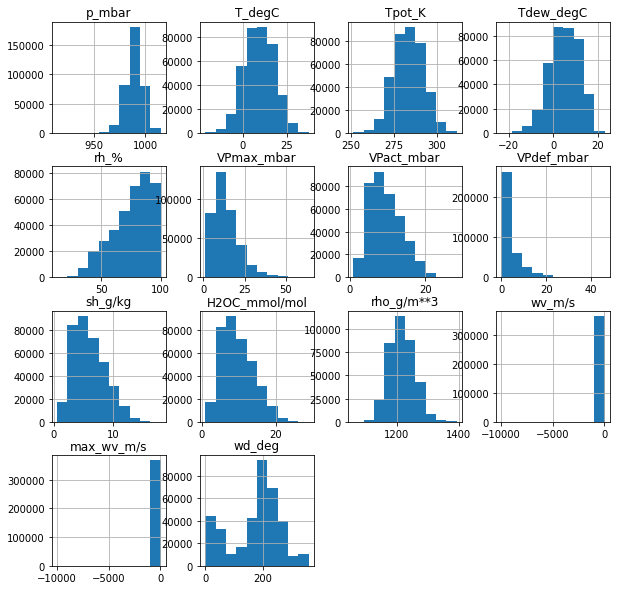

In [113]:
flag = False
df.hist(figsize=(10, 10))
plt.show()
flag = True

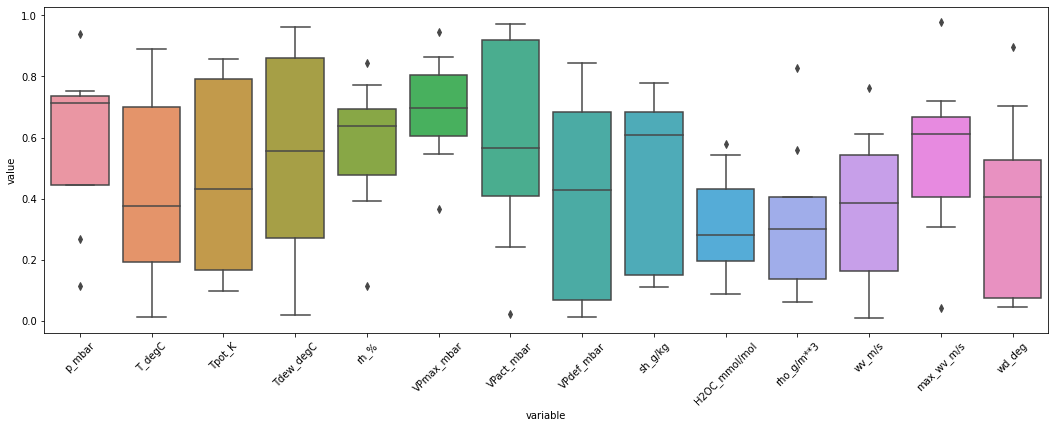

In [114]:
# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
df = pd.DataFrame(data = np.random.random(size=(8,14)), columns = ['p_mbar','T_degC','Tpot_K','Tdew_degC','rh_%','VPmax_mbar','VPact_mbar','VPdef_mbar','sh_g/kg','H2OC_mmol/mol','rho_g/m**3','wv_m/s','max_wv_m/s','wd_deg'])

sns.boxplot(x="variable", y="value", data=pd.melt(df), whis=0.5)
plt.xticks(rotation=45)
plt.show()

En los diferentes casos, vemos ciertos outliers en valores mínimos y máximos. 

# Time Series Analysis

In [160]:
# Convert datetime column to string
df['DateTimeString'] = df['DateTime'].astype(str)


In [161]:
# Convert datetime_str column to datetime and assign to new date column
df['DateTime_DateTime'] = pd.to_datetime(df['DateTime'], format="%d.%m.%Y %H:%M:%S")



In [162]:
# Convert datetime column to date column
df['Date_Month'] = df['DateTime_DateTime'].dt.date

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367994 entries, 0 to 367993
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateTime           367994 non-null  object        
 1   p_mbar             367994 non-null  float64       
 2   T_degC             367994 non-null  float64       
 3   Tpot_K             367994 non-null  float64       
 4   Tdew_degC          367994 non-null  float64       
 5   rh_%               367994 non-null  float64       
 6   VPmax_mbar         367994 non-null  float64       
 7   VPact_mbar         367994 non-null  float64       
 8   VPdef_mbar         367994 non-null  float64       
 9   sh_g/kg            367994 non-null  float64       
 10  H2OC_mmol/mol      367994 non-null  float64       
 11  rho_g/m**3         367994 non-null  float64       
 12  wv_m/s             367994 non-null  float64       
 13  max_wv_m/s         367994 non-null  float64 

In [164]:
df.tail()

,DateTime,p_mbar,T_degC,Tpot_K,Tdew_degC,rh_%,VPmax_mbar,VPact_mbar,VPdef_mbar,sh_g/kg,H2OC_mmol/mol,rho_g/m**3,wv_m/s,max_wv_m/s,wd_deg,DateTimeString,DateTime_DateTime,Date_Month
367989,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,31.12.2016 23:20:00,2016-12-31 23:20:00,2016-12-31
367990,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,31.12.2016 23:30:00,2016-12-31 23:30:00,2016-12-31
367991,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,31.12.2016 23:40:00,2016-12-31 23:40:00,2016-12-31
367992,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,31.12.2016 23:50:00,2016-12-31 23:50:00,2016-12-31
367993,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9,01.01.2017 00:00:00,2017-01-01 00:00:00,2017-01-01


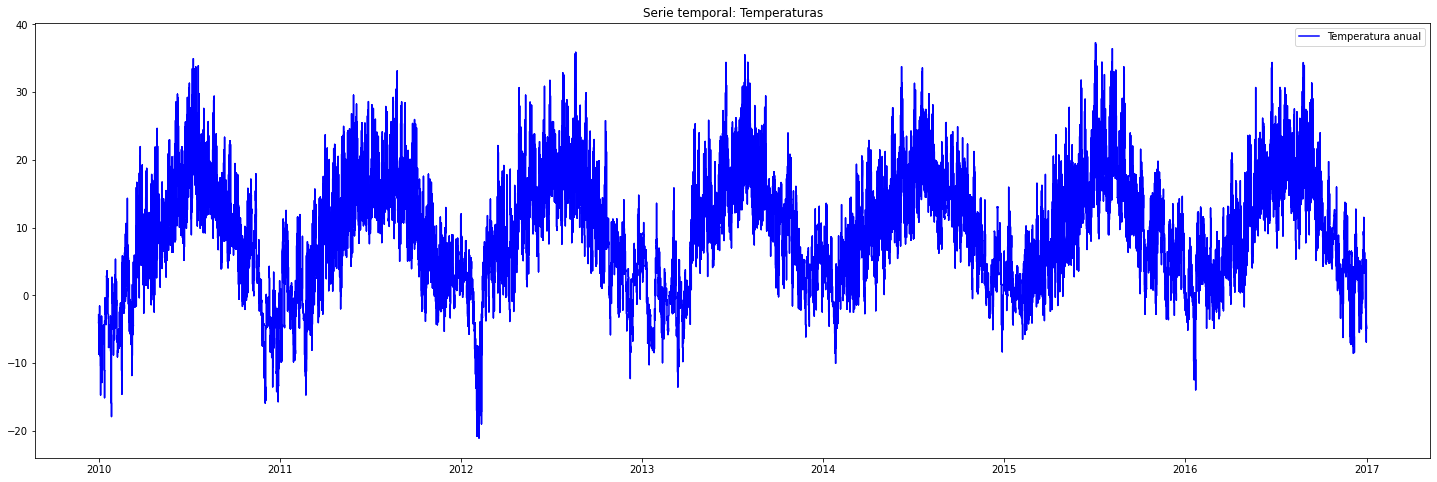

In [165]:
plt.figure(figsize = (25, 8))
plt.title("Serie temporal: Temperaturas")
plt.plot(df.Date_Month, df.T_degC, color="blue", label="Temperatura anual")
plt.legend()
plt.show()

Podemos suavizar este gráfico en datos mensuales, para poder ver su tendencia por ejemplo. Lo haremos en los siguientes gráficos, calculando la media por día, para poder entender mejor.

In [227]:
df_temp_t = pd.DataFrame(df, columns=['T_degC', 'Date_Month'])
df_temp_t = df_temp_t.set_index('Date_Month')

df_temp_t.head()

,T_degC
Date_Month,
2010-01-01,-2.84
2010-01-01,-2.84
2010-01-01,-2.85
2010-01-01,-2.88
2010-01-01,-2.90


In [228]:
df_temp_t.tail()

,T_degC
Date_Month,
2016-12-31,-4.05
2016-12-31,-3.35
2016-12-31,-3.16
2016-12-31,-4.23
2017-01-01,-4.82


In [229]:
# Evaluamos cuántos registros tienen valores nulos por variable
df_temp_t.isna().sum()

T_degC    0
dtype: int64

In [231]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(df_temp_t))
print("Tamaño del dataset: ", df_temp_t.shape)

Cantidad de registros:  367994
Tamaño del dataset:  (367994, 1)


#### Cálculo de media por día

In [232]:
df_temp_t.index = pd.to_datetime(df_temp_t.index)

# Calcular la media por día
df_temp_t_daily = df_temp_t.resample('D').mean()
df_temp_t_daily.index.freq = 'D'

# Ver los últimos registros del nuevo dataframe
df_temp_t_daily.tail()

,T_degC
Date_Month,
2016-12-28,4.887153
2016-12-29,2.676250
2016-12-30,-1.706597
2016-12-31,-2.492500
2017-01-01,-4.820000


In [234]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(df_temp_t_daily))
print("Tamaño del dataset: ", df_temp_t_daily.shape)

Cantidad de registros:  2558
Tamaño del dataset:  (2558, 1)


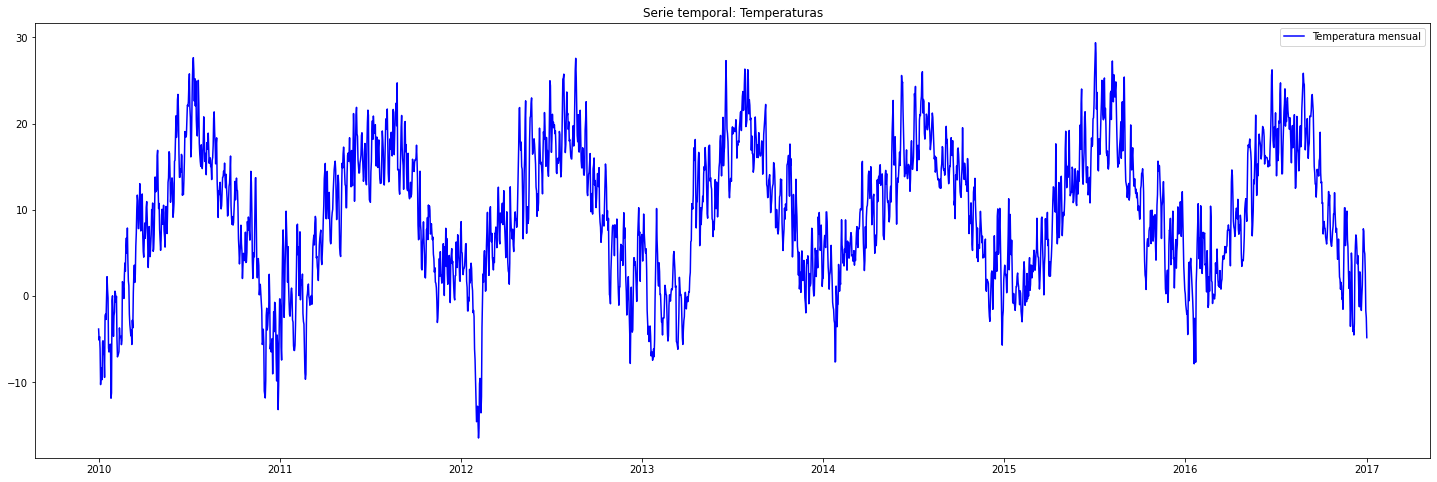

In [250]:
plt.figure(figsize = (25, 8))
plt.title("Serie temporal: Temperaturas")
plt.plot(df_temp_t_daily.index, df_temp_t_daily.T_degC, color="blue", label="Temperatura mensual")
plt.legend()
plt.show()

In [236]:
# Evaluamos cuántos registros tienen valores nulos por variable
df_temp_t_daily.isna().sum()

T_degC    2
dtype: int64

In [237]:
# Create a boolean mask of null values
mask = df_temp_t_daily.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = df_temp_t_daily[mask]

# Print the null rows
print(null_rows)  

            T_degC
Date_Month        
2016-10-26     NaN
2016-10-27     NaN


No tenemos datos para los días 26 y 27 de Octubre de 2016, imputaremos la media del mes de Octubre de 2016 a dichos días.

In [238]:
# Define the desired month and year
month = 10
year = 2016

df_temp_t_daily[(df_temp_t_daily.index.month == month) & (df_temp_t_daily.index.year == year)]

# Impute the missing values using the mean of the subset
df_temp_t_daily['T_degC'].fillna(df_temp_t_daily['T_degC'].mean(), inplace=True)

In [239]:
# Evaluamos cuántos registros tienen valores nulos por variable
df_temp_t_daily.isna().sum()

T_degC    0
dtype: int64

In [240]:
# Create a boolean mask of null values
mask = df_temp_t_daily.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = df_temp_t_daily[mask]

# Print the null rows
print(null_rows)  

Empty DataFrame
Columns: [T_degC]
Index: []


In [242]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(df_temp_t_daily))
print("Tamaño del dataset: ", df_temp_t_daily.shape)

Cantidad de registros:  2558
Tamaño del dataset:  (2558, 1)


In [241]:
df_temp_t_daily

,T_degC
Date_Month,
2010-01-01,-3.819236
2010-01-02,-5.110556
2010-01-03,-4.702222
2010-01-04,-6.132569
2010-01-05,-10.263403
...,...
2016-12-28,4.887153
2016-12-29,2.676250
2016-12-30,-1.706597


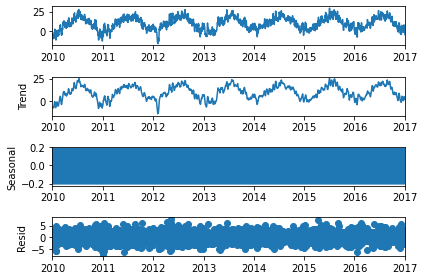

In [245]:
# TOdos los datos
result = seasonal_decompose(df_temp_t_daily, model='additive')
result.plot()
plt.show()


Vamos a ver ahora mensual, ya que aparentemente la tendencia es alcista, y cíclica, pero no se puede ver bien la parte estacional, y los residuos, por la gran cantidad de datos.

#### Cálculo de media por mes

In [246]:
df_temp_t.index = pd.to_datetime(df_temp_t.index)

# Calcular la media por día
df_temp_t_month = df_temp_t.resample('M').mean()
df_temp_t_month.index.freq = 'M'

# Ver los últimos registros del nuevo dataframe
df_temp_t_month.tail()

,T_degC
Date_Month,
2016-09-30,17.412662
2016-10-31,8.695581
2016-11-30,3.821819
2016-12-31,2.003226
2017-01-31,-4.820000


In [248]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(df_temp_t_month))
print("Tamaño del dataset: ", df_temp_t_month.shape)

Cantidad de registros:  85
Tamaño del dataset:  (85, 1)


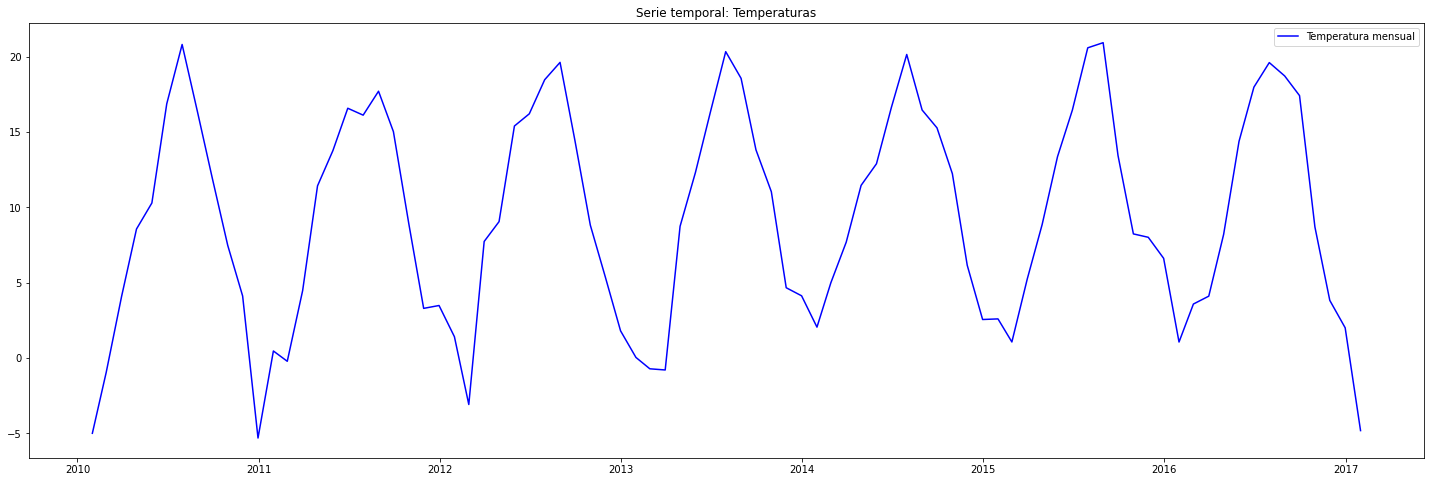

In [251]:
plt.figure(figsize = (25, 8))
plt.title("Serie temporal: Temperaturas")
plt.plot(df_temp_t_month.index, df_temp_t_month.T_degC, color="blue", label="Temperatura mensual")
plt.legend()
plt.show()

In [252]:
# Evaluamos cuántos registros tienen valores nulos por variable
df_temp_t_month.isna().sum()

T_degC    0
dtype: int64

In [254]:
# Create a boolean mask of null values
mask = df_temp_t_month.isnull().any(axis=1)

# Index the original dataframe using the mask to get only the rows with null values
null_rows = df_temp_t_month[mask]

# Print the null rows
print(null_rows)  

Empty DataFrame
Columns: [T_degC]
Index: []


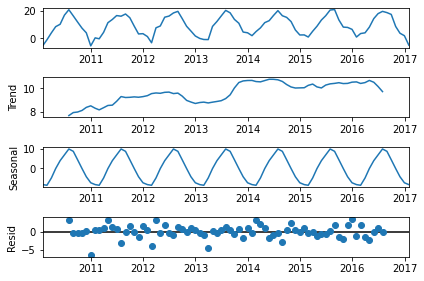

In [255]:
# TOdos los datos
result = seasonal_decompose(df_temp_t_month, model='additive')
result.plot()
plt.show()

Vemos la tendencia que incrementa entre el 2013 y el 2014, inclinándose hacia arriba, en el úlitmo año parece bajar.
Se ve claramente la estacionalidad por año.
Los residuos son más o menos constantes. Aunque se ven ciertos outlyers en 2011, 2012, 2013. No los eliminaré. Al eliminar los valores atípicos, se espera que los residuos sean más homogéneos y se ajusten mejor a la distribución normal. Esto puede ayudar a identificar patrones o tendencias en los datos que de otra manera podrían pasar desapercibidos.Pero, es importante tener en cuenta que la eliminación de valores atípicos también puede tener un impacto en la validez de los resultados. Por lo tanto, no se eliminarán.
Nada nos indica que no seremos capaces de aplicar las técnicas para hacer las predicciones.

Vamos a usar en los modelos el dataset de df_temp_t_month, luego probaremos el daily en vez del mensual, para tener mayor cantidad de datos.

# Models

Definimos la función que nos permitirá separar los atributos (X) del target (y):
- X será una secuencia de valores hasta una marca de tiempo t
- y será el valor de la secuencia en la marca de tiempo t+1

In [256]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

Definimos los valores para la partición de X e y

In [264]:
# define input sequence
raw_seq = df_temp_t_month.T_degC

# choose a number of time steps (the bigger, the longer-term knowledge will maintain but it'll also increase computational)
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape for fitting the network
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [265]:
X.shape[0]

73

In [266]:
# Separación de los datos
X_train = X[:-12*5]
y_train = y[0:-12*5]
X_test = X[-12*5:]
y_test = y[-12*5:]


In [267]:
# Primer registro
X[0], y[0]

(array([[-4.99925403],
        [-0.94406994],
        [ 4.09448029],
        [ 8.55915046],
        [10.286931  ],
        [16.86869907],
        [20.80791233],
        [16.32973342],
        [11.90801852],
        [ 7.46748656],
        [ 4.11261111],
        [-5.31392249]]), 0.4640837813620072)

In [268]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn.metrics import mean_squared_error

In [269]:
# 1st LSTM
lstm_temp1 = tf.keras.models.Sequential()
lstm_temp1.add(tf.keras.layers.LSTM(1, activation='relu', input_shape=(n_steps, n_features)))

lstm_temp1.add(tf.keras.layers.Flatten())
lstm_temp1.add(tf.keras.layers.Dense(256, activation='relu'))
lstm_temp1.add(Dropout(0.2))
lstm_temp1.add(tf.keras.layers.Dense(128, activation='relu'))
lstm_temp1.add(Dropout(0.2))
lstm_temp1.add(tf.keras.layers.Dense(32, activation='relu'))
lstm_temp1.add(Dropout(0.2))
lstm_temp1.add(tf.keras.layers.Dense(1))
lstm_temp1.compile(optimizer='adam', loss='mse')
# fit model
lstm_temp1.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 116.8578
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 116.7093
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 116.6124
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 116.4728
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 116.3200
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 116.0931
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 115.9355
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 115.6609
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 115.4694
Epoch 10/10
1/1 [==============================] - 0s 16ms/step - loss: 115.3099


Loss disminuye muy poco.

In [271]:
# Predicting values for this LSTM (LSTM1)
pred_lstm1 = []
x_pred_lstm1 = []
# Predicting some of the last samples
for i in range(len(df_temp_t_month.T_degC)-60, len(df_temp_t_month.T_degC)):
  low_lim = i-n_steps
  up_lim = i
  x_pred_lstm1.append(i-1)
  x_input = df_temp_t_month.T_degC.values[low_lim:up_lim]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = lstm_temp1.predict(x_input, verbose=0)
  pred_lstm1.append(yhat[0][0])

# Modelo 2

In [272]:
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
lstm_temp2 = Sequential()


lstm_temp2.add(LSTM(units=8, return_sequences=True, activation='relu'))
lstm_temp2.add(Dropout(0.2))
lstm_temp2.add(LSTM(units=16, return_sequences=True, activation='relu'))
lstm_temp2.add(Dropout(0.2))
lstm_temp2.add(LSTM(units=32, return_sequences=True, activation='relu'))
lstm_temp2.add(LSTM(units=64, return_sequences=True, activation='relu'))
# Como LSTM es un modelo de recurrencia de redes neuronales aplicaremos la capa de envoltorio bidireccional que se usa para este tipo de redes neuronales.
# lstm_temp2.add(Bidirectional(LSTM(128, activation='relu')))
lstm_temp2.add(Flatten())

lstm_temp2.add(Dense(100, activation='relu'))
lstm_temp2.add(Dense(1))

lstm_temp2.compile(loss='mse', optimizer='adam')

lstm_temp2.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 9s 9s/step - loss: 116.8341
Epoch 2/10
1/1 [==============================] - 0s 26ms/step - loss: 116.1852
Epoch 3/10
1/1 [==============================] - 0s 28ms/step - loss: 115.4504
Epoch 4/10
1/1 [==============================] - 0s 26ms/step - loss: 114.7621
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 114.1630
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 112.9428
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 112.0282
Epoch 8/10
1/1 [==============================] - 0s 30ms/step - loss: 110.4887
Epoch 9/10
1/1 [==============================] - 0s 32ms/step - loss: 108.6474
Epoch 10/10
1/1 [==============================] - 0s 27ms/step - loss: 107.1919


Función de pérdida con valores más bajos. Un poco mejor, pero es altísimo.

In [274]:
# Predicting values for this LSTM (LSTM2)
pred_lstm2 = []
x_pred_lstm2 = []
# Predicting some of the last samples
for i in range(len(df_temp_t_month.T_degC.values)-60, len(df_temp_t_month.T_degC.values)):
  low_lim = i-n_steps
  up_lim = i
  x_pred_lstm2.append(i-1)
  x_input = df_temp_t_month.T_degC.values[low_lim:up_lim]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = lstm_temp2.predict(x_input, verbose=0)
  pred_lstm2.append(yhat[0][0])

Comparación LSTM

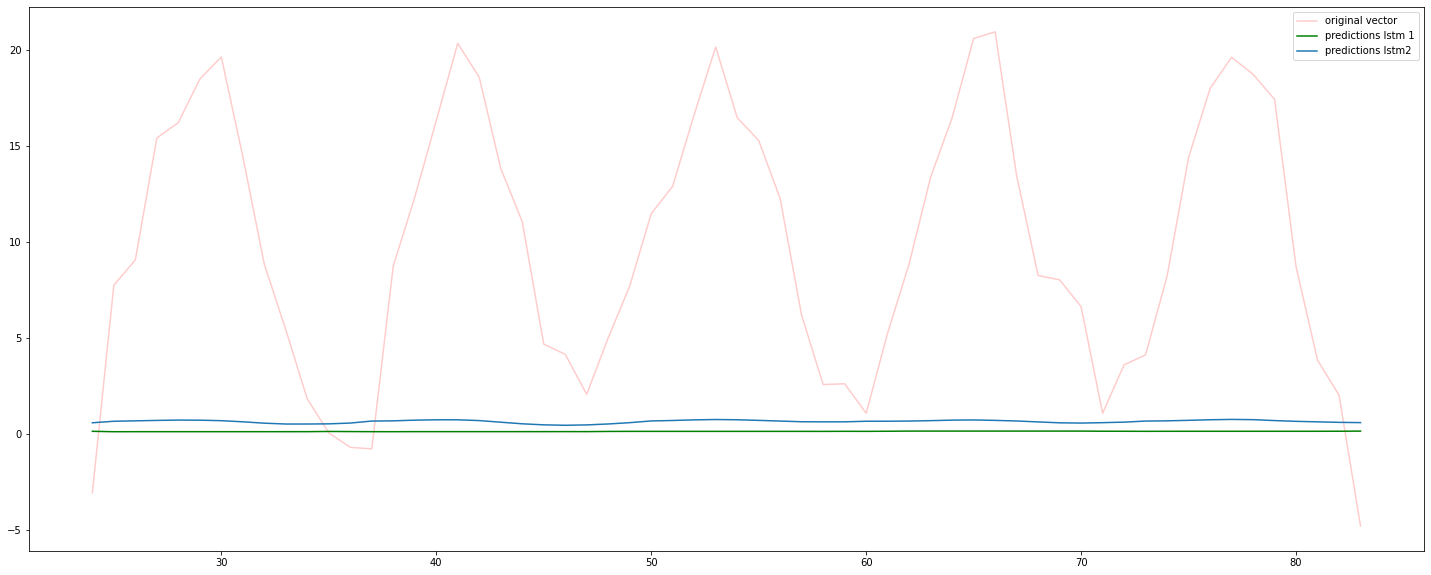

In [275]:
plt.figure(figsize = (25, 10))
plt.plot(x_pred_lstm1, df_temp_t_month.T_degC.values[-60:], 'r', alpha = 0.2, label = 'original vector')
plt.plot(x_pred_lstm1, pred_lstm1, 'g', label = 'predictions lstm 1')

plt.plot(x_pred_lstm2, pred_lstm2, label = 'predictions lstm2')
plt.legend()
plt.show()

Muy malas predicciones con meses. Con una sola capa, muy mala, con la segunda mejor levemente si es que se puede decir mejor.
Veremos con daily dataset...

## CON DAILY DATASET

# MODELO 1

In [276]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [278]:
# define input sequence
raw_seq = df_temp_t_daily.T_degC

# choose a number of time steps (the bigger, the longer-term knowledge will maintain but it'll also increase computational)
n_steps = 30

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape for fitting the network
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [279]:
X.shape[0]

2528

In [291]:
# Separación de los datos
X_train = X[:-30*7]
y_train = y[0:-30*7]
X_test = X[-30*7:]
y_test = y[-30*7:]


In [292]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Cantidad de registros: ", len(X_train))
print("Tamaño del dataset: ", X_train.shape)
print("Cantidad de registros: ", len(X_test))
print("Tamaño del dataset: ", X_test.shape)
print("Cantidad de registros: ", len(y_train))
print("Tamaño del dataset: ", y_train.shape)
print("Cantidad de registros: ", len(y_test))
print("Tamaño del dataset: ", y_test.shape)

Cantidad de registros:  2318
Tamaño del dataset:  (2318, 30, 1)
Cantidad de registros:  210
Tamaño del dataset:  (210, 30, 1)
Cantidad de registros:  2318
Tamaño del dataset:  (2318,)
Cantidad de registros:  210
Tamaño del dataset:  (210,)


In [293]:
# Primer registro
X[0], y[0]

(array([[ -3.81923611],
        [ -5.11055556],
        [ -4.70222222],
        [ -6.13256944],
        [-10.26340278],
        [ -9.02819444],
        [ -8.34826389],
        [ -9.68708333],
        [ -5.31520833],
        [ -5.17743056],
        [ -6.73388889],
        [ -6.86090278],
        [ -9.43173611],
        [ -2.34152778],
        [ -2.10347222],
        [ -2.70979167],
        [ -0.04131944],
        [  2.24951389],
        [  0.76208333],
        [ -0.22277778],
        [ -6.01340278],
        [ -6.48701389],
        [ -5.82847222],
        [ -5.60118056],
        [ -5.58611111],
        [-11.84291667],
        [-11.23770833],
        [ -0.53916667],
        [  0.02861111],
        [ -2.18076389]]), -4.670763888888889)

In [294]:
# 1st LSTM
lstm_temp1 = tf.keras.models.Sequential()
lstm_temp1.add(tf.keras.layers.LSTM(1, activation='relu', input_shape=(n_steps, n_features)))

lstm_temp1.add(tf.keras.layers.Flatten())
lstm_temp1.add(tf.keras.layers.Dense(256, activation='relu'))
lstm_temp1.add(Dropout(0.2))
lstm_temp1.add(tf.keras.layers.Dense(128, activation='relu'))
lstm_temp1.add(Dropout(0.2))
lstm_temp1.add(tf.keras.layers.Dense(32, activation='relu'))
lstm_temp1.add(Dropout(0.2))
lstm_temp1.add(tf.keras.layers.Dense(1))
lstm_temp1.compile(optimizer='adam', loss='mse')
# fit model
lstm_temp1.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
73/73 [==============================] - 3s 12ms/step - loss: 114.1667
Epoch 2/10
73/73 [==============================] - 1s 12ms/step - loss: 61.5064
Epoch 3/10
73/73 [==============================] - 1s 11ms/step - loss: 60.5681
Epoch 4/10
73/73 [==============================] - 1s 12ms/step - loss: 61.3812
Epoch 5/10
73/73 [==============================] - 1s 12ms/step - loss: 60.1960
Epoch 6/10
73/73 [==============================] - 1s 12ms/step - loss: 60.2783
Epoch 7/10
73/73 [==============================] - 1s 11ms/step - loss: 61.1479
Epoch 8/10
73/73 [==============================] - 1s 13ms/step - loss: 61.6598
Epoch 9/10
73/73 [==============================] - 1s 18ms/step - loss: 60.8818
Epoch 10/10
73/73 [==============================] - 1s 18ms/step - loss: 60.3392


Pérdida mucho más baja que con el dataset mensual.

In [295]:
# Predicting values for this LSTM (LSTM1)
pred_lstm1 = []
x_pred_lstm1 = []
# Predicting some of the last samples
for i in range(len(df_temp_t_daily.T_degC)-60, len(df_temp_t_daily.T_degC)):
  low_lim = i-n_steps
  up_lim = i
  x_pred_lstm1.append(i-1)
  x_input = df_temp_t_daily.T_degC.values[low_lim:up_lim]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = lstm_temp1.predict(x_input, verbose=0)
  pred_lstm1.append(yhat[0][0])

# Modelo 2

In [311]:
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
lstm_temp2 = Sequential()


lstm_temp2.add(LSTM(units=8, return_sequences=True, activation='relu'))
lstm_temp2.add(Dropout(0.2))
lstm_temp2.add(LSTM(units=16, return_sequences=True, activation='relu'))
lstm_temp2.add(Dropout(0.2))
lstm_temp2.add(LSTM(units=32, return_sequences=True, activation='relu'))
lstm_temp2.add(LSTM(units=64, return_sequences=True, activation='relu'))
lstm_temp2.add(LSTM(units=128, return_sequences=True, activation='relu'))
# Como LSTM es un modelo de recurrencia de redes neuronales aplicaremos la capa de envoltorio bidireccional que se usa para este tipo de redes neuronales.
# lstm_temp2.add(Bidirectional(LSTM(128, activation='relu')))
lstm_temp2.add(Flatten())

lstm_temp2.add(Dense(100, activation='relu'))
lstm_temp2.add(Dense(1))

lstm_temp2.compile(loss='mse', optimizer='adam')

lstm_temp2.fit(X_train, y_train, epochs=40, verbose=1)

Epoch 1/40
73/73 [==============================] - 18s 101ms/step - loss: 57.9687
Epoch 2/40
73/73 [==============================] - 8s 116ms/step - loss: 29.2187
Epoch 3/40
73/73 [==============================] - 8s 112ms/step - loss: 23.5704
Epoch 4/40
73/73 [==============================] - 8s 104ms/step - loss: 21.3700
Epoch 5/40
73/73 [==============================] - 8s 116ms/step - loss: 21.3617
Epoch 6/40
73/73 [==============================] - 8s 104ms/step - loss: 20.0901
Epoch 7/40
73/73 [==============================] - 8s 113ms/step - loss: 19.3563
Epoch 8/40
73/73 [==============================] - 9s 117ms/step - loss: 18.2675
Epoch 9/40
73/73 [==============================] - 7s 102ms/step - loss: 16.3101
Epoch 10/40
73/73 [==============================] - 8s 116ms/step - loss: 14.5065
Epoch 11/40
73/73 [==============================] - 8s 115ms/step - loss: 20.2436
Epoch 12/40
73/73 [==============================] - 7s 101ms/step - loss: 13.2012
Epoch 13/40


Valores de pérdida mejor

In [312]:
# Predicting values for this LSTM (LSTM2)
pred_lstm2 = []
x_pred_lstm2 = []
# Predicting some of the last samples
for i in range(len(df_temp_t_daily.T_degC.values)-60, len(df_temp_t_daily.T_degC.values)):
  low_lim = i-n_steps
  up_lim = i
  x_pred_lstm2.append(i-1)
  x_input = df_temp_t_daily.T_degC.values[low_lim:up_lim]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = lstm_temp2.predict(x_input, verbose=0)
  pred_lstm2.append(yhat[0][0])

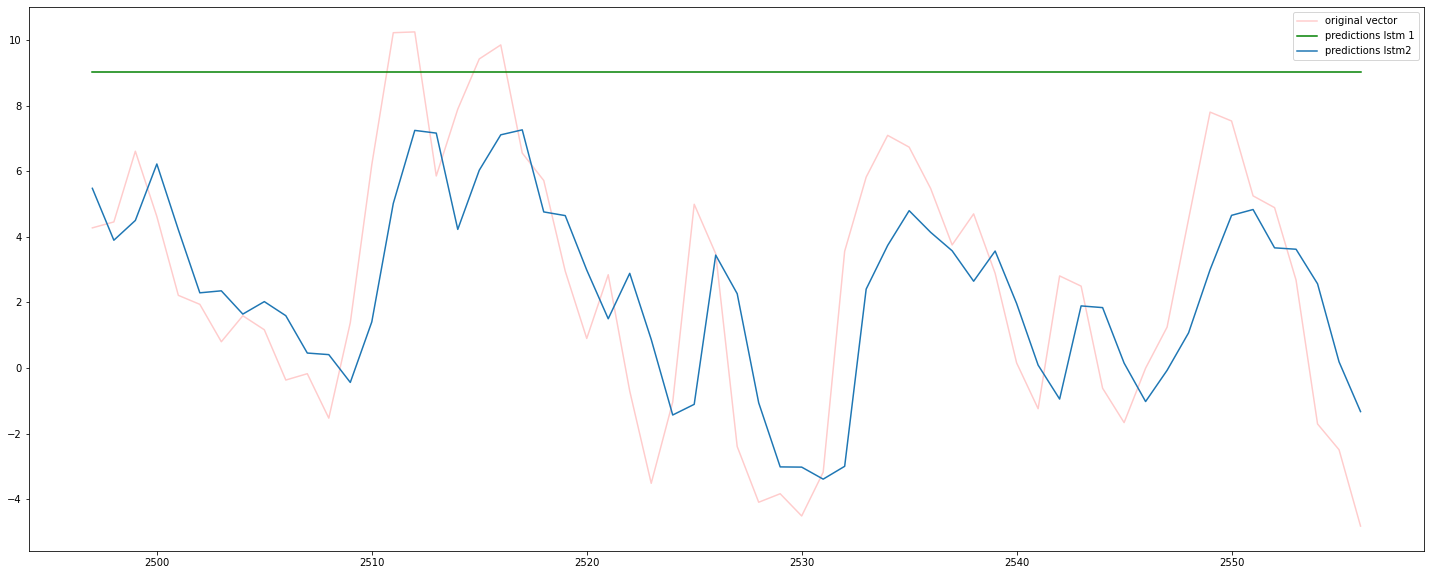

In [313]:
plt.figure(figsize = (25, 10))
plt.plot(x_pred_lstm1, df_temp_t_daily.T_degC.values[-60:], 'r', alpha = 0.2, label = 'original vector')
plt.plot(x_pred_lstm1, pred_lstm1, 'g', label = 'predictions lstm 1')

plt.plot(x_pred_lstm2, pred_lstm2, label = 'predictions lstm2')
plt.legend()
plt.show()

Con EPOCHS = 40 mejora la predicción. El valor de loss aún sigue siendo alto de 7%. Probaremos con CNN.

Reentranaremos con mas epochs en el modelo 2, ya que el 1 demostró no ser muy bueno.

Todo sigue muy mal, EPOCHS: 10
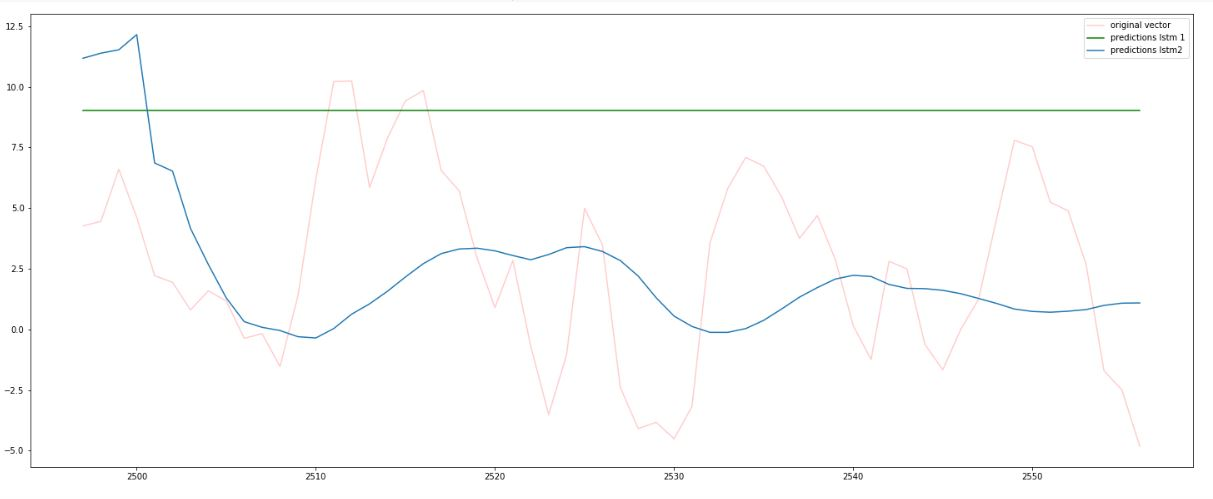

Con EPOCHS = 20 mejora tendencia pero no es precisa aún

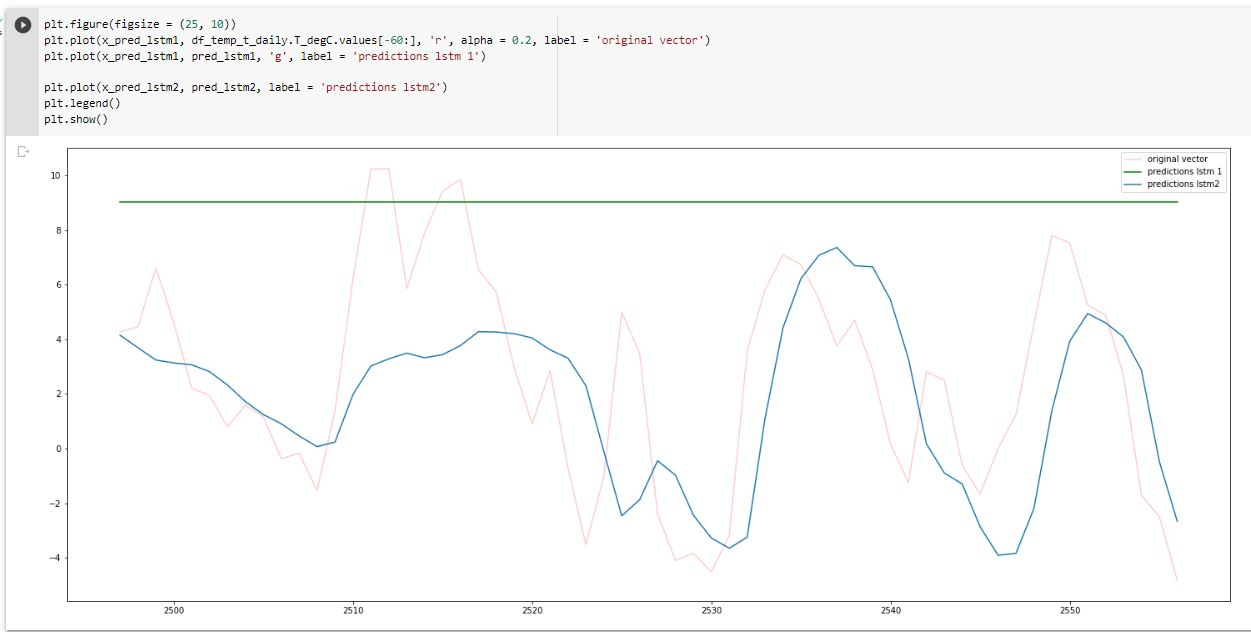

Con EPOCHS = 30 mejora aún mas

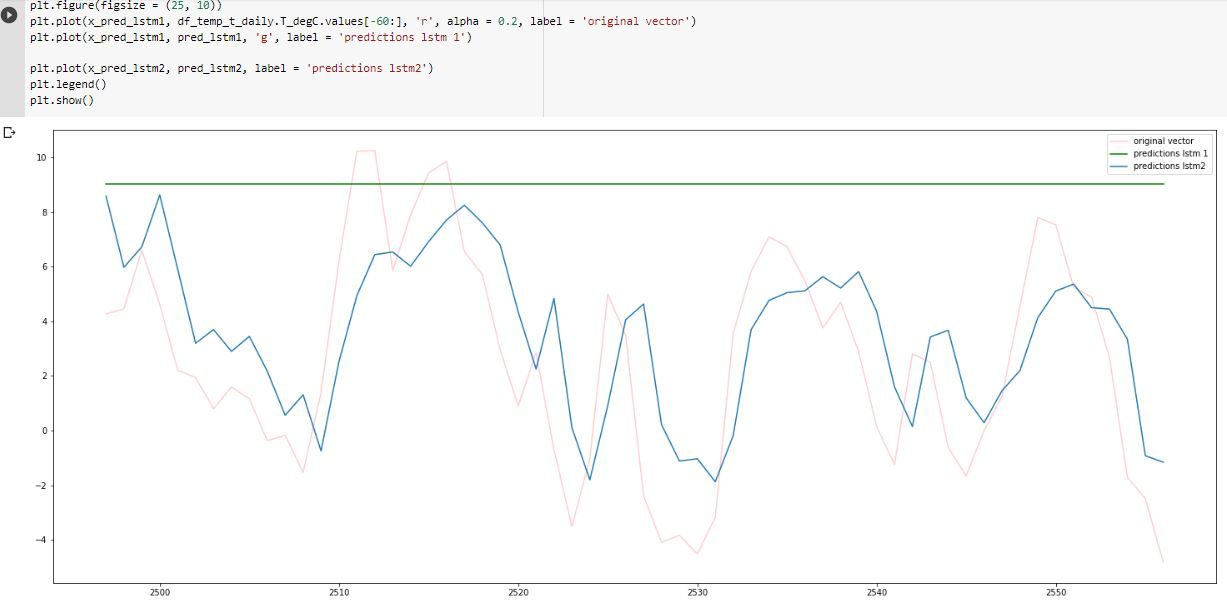

# CNN

## Modelo 1 con Daily Dataset

In [352]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 20)

cnn_temp = tf.keras.models.Sequential()
cnn_temp.add(tf.keras.layers.Conv1D(filters=1, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
cnn_temp.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# cnn_temp.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))

# cnn_temp.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
cnn_temp.add(Flatten())
cnn_temp.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_temp.add(tf.keras.layers.Dropout(0.2))
cnn_temp.add(tf.keras.layers.Dense(32, activation='relu'))
cnn_temp.add(tf.keras.layers.Dense(1))
cnn_temp.add(tf.keras.layers.Dense(16, activation='relu'))
cnn_temp.add(tf.keras.layers.Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_temp.compile(optimizer=opt, loss='mse')
# fit model
cnn_temp.fit(X_train, y_train, epochs=30, verbose=1, callbacks = [early_stop])

Epoch 1/30
73/73 [==============================] - 1s 2ms/step - loss: 142.6250
Epoch 2/30
73/73 [==============================] - 0s 3ms/step - loss: 97.9185
Epoch 3/30
73/73 [==============================] - 0s 2ms/step - loss: 37.1495
Epoch 4/30
73/73 [==============================] - 0s 2ms/step - loss: 34.8462
Epoch 5/30
73/73 [==============================] - 0s 2ms/step - loss: 33.4460
Epoch 6/30
73/73 [==============================] - 0s 2ms/step - loss: 33.7358
Epoch 7/30
73/73 [==============================] - 0s 2ms/step - loss: 32.4500
Epoch 8/30
73/73 [==============================] - 0s 2ms/step - loss: 32.2815
Epoch 9/30
73/73 [==============================] - 0s 2ms/step - loss: 31.8778
Epoch 10/30
73/73 [==============================] - 0s 2ms/step - loss: 31.4796
Epoch 11/30
73/73 [==============================] - 0s 2ms/step - loss: 31.3817
Epoch 12/30
73/73 [==============================] - 0s 2ms/step - loss: 30.9327
Epoch 13/30
73/73 [=================

Valores altos de loss pero no tanto como los modelos anteriores que daban mayor a 100.

In [340]:
# Predicting values for this CNN (CNN1)
pred_cnn1 = []
x_pred_cnn1 = []
# Predicting some of the last samples
for i in range(len(df_temp_t_daily.T_degC.values)-60, len(df_temp_t_daily.T_degC.values)):
  low_lim = i-n_steps
  up_lim = i
  x_pred_cnn1.append(i-1)
  x_input = df_temp_t_daily.T_degC.values[low_lim:up_lim]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat_cnn = cnn_temp.predict(x_input, verbose=0)
  pred_cnn1.append(yhat_cnn[0][0])

## Modelo 2

In [358]:
# More complex CNN
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 20)
cnn_lstm = Sequential()

cnn_lstm.add(Conv1D(filters=128, kernel_size=2, activation='LeakyReLU'))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(Conv1D(filters=64, kernel_size=2, activation='LeakyReLU'))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(LSTM(units=8, return_sequences=True, activation='LeakyReLU'))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(LSTM(units=16, return_sequences=True, activation='LeakyReLU'))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Flatten())
cnn_lstm.add(Dense(100, activation='LeakyReLU'))
cnn_lstm.add(Dense(1))


opt = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_lstm.compile(optimizer=opt, loss='mse')
# fit model
cnn_lstm.fit(X_train, y_train, epochs=20, verbose=1, callbacks = [early_stop])

Epoch 1/20
73/73 [==============================] - 7s 14ms/step - loss: 39.1515
Epoch 2/20
73/73 [==============================] - 1s 13ms/step - loss: 27.5860
Epoch 3/20
73/73 [==============================] - 1s 14ms/step - loss: 25.4761
Epoch 4/20
73/73 [==============================] - 2s 21ms/step - loss: 22.5815
Epoch 5/20
73/73 [==============================] - 1s 19ms/step - loss: 21.6119
Epoch 6/20
73/73 [==============================] - 1s 13ms/step - loss: 20.9309
Epoch 7/20
73/73 [==============================] - 1s 13ms/step - loss: 19.9509
Epoch 8/20
73/73 [==============================] - 1s 13ms/step - loss: 20.0032
Epoch 9/20
73/73 [==============================] - 1s 13ms/step - loss: 19.6188
Epoch 10/20
73/73 [==============================] - 1s 14ms/step - loss: 18.7050
Epoch 11/20
73/73 [==============================] - 1s 13ms/step - loss: 19.2557
Epoch 12/20
73/73 [==============================] - 1s 13ms/step - loss: 18.6027
Epoch 13/20
73/73 [======

In [359]:
# Predicting values for this CNN (CNN2)
pred_cnn2 = []
x_pred_cnn2 = []
# Predicting some of the last samples
for i in range(len(df_temp_t_daily.T_degC.values)-60, len(df_temp_t_daily.T_degC.values)):
  low_lim = i-n_steps
  up_lim = i
  x_pred_cnn2.append(i-1)
  x_input = df_temp_t_daily.T_degC.values[low_lim:up_lim]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat_cnn = cnn_lstm.predict(x_input, verbose=0)
  pred_cnn2.append(yhat_cnn[0][0])

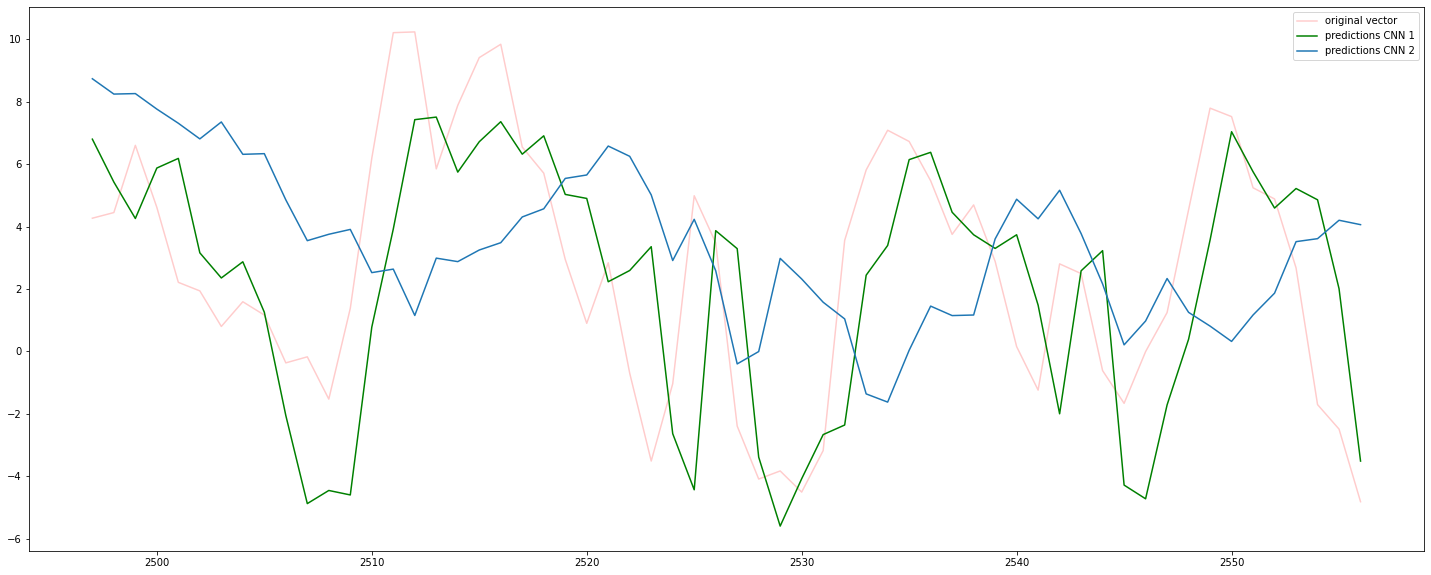

In [360]:
plt.figure(figsize = (25, 10))
plt.plot(x_pred_cnn1, df_temp_t_daily.T_degC[-60:], 'r', alpha = 0.2, label = 'original vector')
plt.plot(x_pred_cnn1, pred_cnn1, 'g', label = 'predictions CNN 1')

plt.plot(x_pred_cnn2, pred_cnn2, label = 'predictions CNN 2')
plt.legend()
plt.show()

EPOCHS = 10

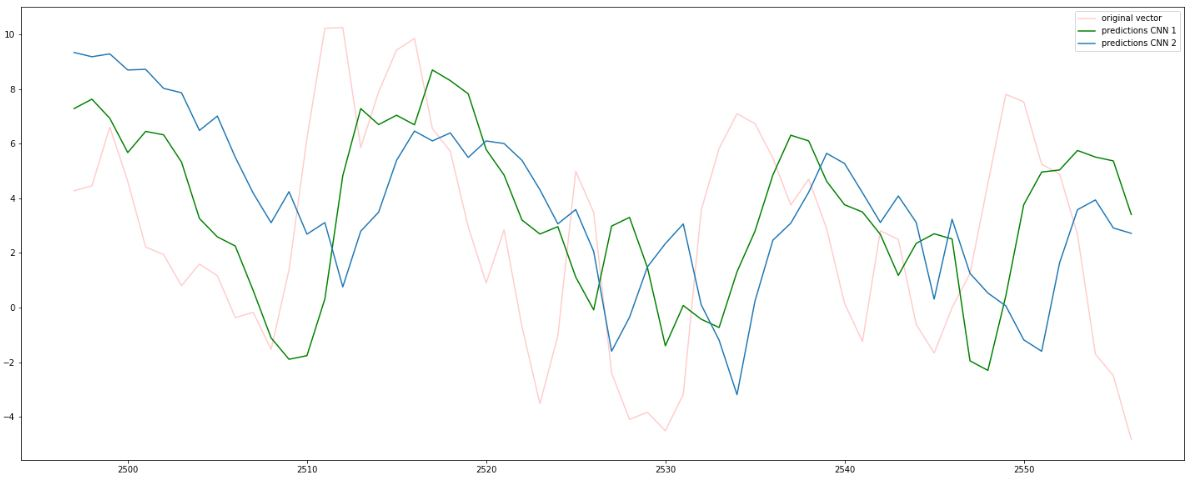

EPOCHS = 20. Podría decirse que el modelo 1 está mejor pero al final se desvarían los dos sobre el final.

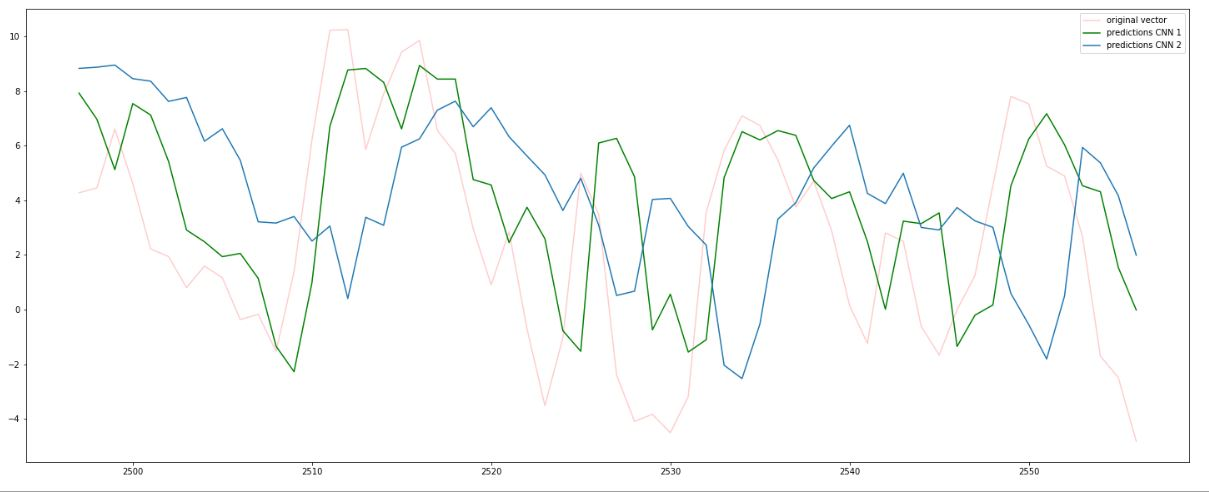

Intenté probar con función LeakyReanu para valores negativos pequeños. Pero no mucha mejora en bajar loss.

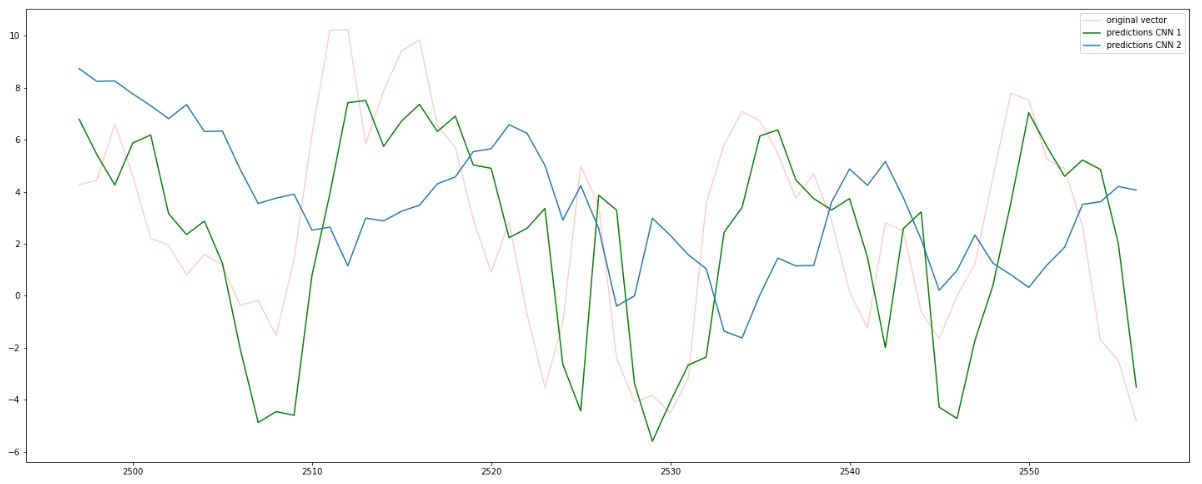

He probado con muchas opciones que no están todas plasmadas porque fui cambiando en el mismo código, pero el mínimo loss que llegué fue de 9%. Se comprueba que al agregar capas el tiempo de procesamiento aumenta, como así también si se agregan epochs. 
Quizás podrían implementarse optimizadores, como Bayes para ir acotando la función en las iteraciones y nos de los parámetros adecuados para la red.
